## install tensorflow 2.0.0 with beta 1 version

In [0]:
!pip install -q gast==0.3.3

In [0]:
!pip install -q tensorflow-gpu==2.0.0 -beta1

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model


## Load fashion_MNIST dataset

In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train, x_test=x_train/255.0, x_test/255.0
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28)


In [6]:
import numpy as np

x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
k=len(set(y_train))
print("Number of classes:",k)

Number of classes: 10


## Model Building

In [0]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3), strides=2, activation='relu')(i)
x=Conv2D(64,(3,3), strides=2, activation='relu')(x)
x=Conv2D(128,(3,3), strides=2, activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)

## compile and fit model

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r=model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 15s 257us/sample - loss: 0.5219 - accuracy: 0.8073 - val_loss: 0.4152 - val_accuracy: 0.8374
Epoch 2/15
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3645 - accuracy: 0.8633 - val_loss: 0.3418 - val_accuracy: 0.8718
Epoch 3/15
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3137 - accuracy: 0.8809 - val_loss: 0.3215 - val_accuracy: 0.8811
Epoch 4/15
60000/60000 [==============================] - 9s 154us/sample - loss: 0.2836 - accuracy: 0.8928 - val_loss: 0.3032 - val_accuracy: 0.8902
Epoch 5/15
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2560 - accuracy: 0.9032 - val_loss: 0.2935 - val_accuracy: 0.8938
Epoch 6/15
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2356 - accuracy: 0.9091 - val_loss: 0.2951 - val_accuracy: 0.8976
Epoch 7/15
60000/60000 [========================

## plot loss per iteration

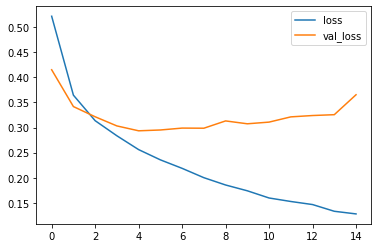

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

## plot accuracy per iteration

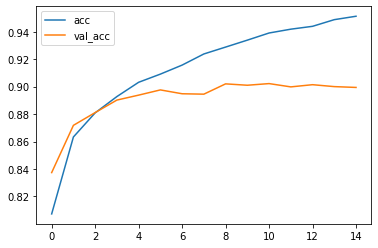

In [18]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

## confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


Confusion matrix, without normalization
[[868   0  24  19   3   1  81   0   4   0]
 [  0 969   2  19   3   0   6   0   1   0]
 [ 17   0 866  18  55   0  43   0   1   0]
 [ 10   0  15 923  31   0  21   0   0   0]
 [  0   0  53  26 851   0  68   0   2   0]
 [  1   0   0   1   0 971   0  16   0  11]
 [125   3  84  31 101   0 650   0   6   0]
 [  0   0   0   0   0   9   0 948   0  43]
 [  1   0   7   5   6   2   6   3 970   0]
 [  1   0   0   0   0   6   0  15   0 978]]


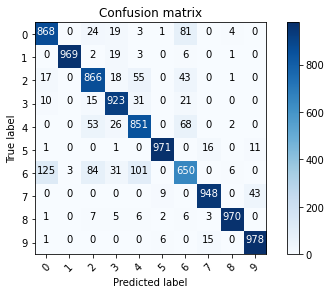

In [20]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

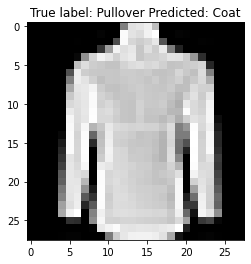

In [24]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [0]:
model.save('TF2.0_CNN_fashion_mnist.h5')